<img src="./img/logo.png">  <br>
* ref : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# -------------------------------------------------
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

import matplotlib.image as img

sns.set()

In [55]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")
sub = pd.read_csv("./dataset/sample_submission.csv")
train_test = pd.concat([train, test], axis=0)

In [56]:
train.shape, test.shape, train_test.shape

((1460, 81), (1459, 80), (2919, 81))

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [59]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Id : 유니크 피쳐 삭제

In [60]:
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

## target 
* 분류 : 불균형 확인
* 회귀 : 불균화(정규분포여부), 로그(지수)

#### SalePrice

In [61]:
y = train['SalePrice']
X = train.drop(['SalePrice'], axis=1)

In [62]:
y.shape , X.shape

((1460,), (1460, 79))

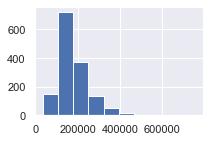

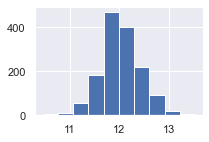

In [63]:
y.hist(figsize=(3,2))
plt.show()

y_log = np.log1p(y)
y_log.hist(figsize=(3,2))
plt.show()

## 1차점수 : 무조건 점수보다 보자(nan x, object x)

#### 모델
* Lasso, Ridge, ElasicNet , RandomForestRegressor, XGBoostRegressor , LightGBMRegressor, *TreeRegressor

#### 평가 매트릭스 
* RMSE  -- np.sqrt(MSE)
* ‘neg_mean_squared_error’   metrics.mean_squared_error(square=False)

* RMSE = $\sqrt{\frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 } $ 
 ---


#### 결측처리 
* object 타입 - 'NAN'
* numeric 타입 - 0

In [64]:
cols_obj = train.select_dtypes(include='object').columns.values.tolist()
cols_num = train.select_dtypes(exclude='object').columns.values.tolist()
# print(cols_obj)
# print(cols_num)
train[cols_obj] = train[cols_obj].fillna('NAN')  #, inplace=True)
train[cols_num] = train[cols_num].fillna(0)  #, inplace=True)

In [65]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

#### object 처리
* pd.get_dummies() = LabelEncoder() + OneHotEncoder()

In [66]:
train = pd.get_dummies(train)

#### 타겟피쳐 로그변환

In [67]:
y_log = np.log1p(train['SalePrice'])
X = train.drop(['SalePrice'], axis=1)

#### 모델선정&학습&평가
* LinearRegression	 RMSE:146006.0727
* Ridge	 RMSE:119478.1456

In [68]:
X_train, X_val, y_train, y_val =train_test_split(X, y_log, test_size=0.2, random_state=1414)
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), DecisionTreeRegressor(),XGBRegressor(), LGBMRegressor()]
for model in models:
    model.fit(X_train,  y_train)
    pred = model.predict(X_val)
    
    #--------error : Mean Squared Logarithmic Error cannot be used when targets contain negative values.
    #--------로그값y를 지수화해서 원래값으로 복원
    y_val_exp = np.expm1(y_val) 
    pred_exp = np.expm1(pred)    
    #print(y_log[:5], pred[:5], y_val_exp[:5],pred_exp[:5]) 
          
    rmse = mean_squared_error(y_val_exp, pred_exp, squared=False)
    print(f"{model.__class__.__name__}\t RMSE:{rmse:.4f}")    

#  목표점수 ----------- 4628명 참가 / 0.05139  ~ 123.56653     0.05< ㅌ < 한자리수.00
  

LinearRegression	 RMSE:146323.3150
Ridge	 RMSE:119954.9565
Lasso	 RMSE:313169.5661
ElasticNet	 RMSE:276313.6288
RandomForestRegressor	 RMSE:38425.2662
DecisionTreeRegressor	 RMSE:48799.6387
XGBRegressor	 RMSE:41018.6984
LGBMRegressor	 RMSE:36076.7478


# EDA

In [69]:
train = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")
train_test = pd.concat([train, test] , axis=0)

### Object 타입

In [70]:
for col in cols_obj:
    print(f'{col} \t\t {train_test[col].nunique()} \t\t {train_test[col].unique()}')

MSZoning 		 5 		 ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street 		 2 		 ['Pave' 'Grvl']
Alley 		 2 		 [nan 'Grvl' 'Pave']
LotShape 		 4 		 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 		 4 		 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 		 2 		 ['AllPub' 'NoSeWa' nan]
LotConfig 		 5 		 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 		 3 		 ['Gtl' 'Mod' 'Sev']
Neighborhood 		 25 		 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 		 9 		 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 		 8 		 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 		 5 		 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 		 8 		 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 		 6 		 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'

#### 방법2) dict를 적용한 map() 사용

In [71]:
for col in cols_obj:
    unique_val_list = train[col].unique().tolist()   #['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
    dict = {val :i for i, val in enumerate(unique_val_list)}
    print(col, dict)
    train[col] = train[col].map(dict)

MSZoning {'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4}
Street {'Pave': 0, 'Grvl': 1}
Alley {nan: 0, 'Grvl': 1, 'Pave': 2}
LotShape {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
LandContour {'Lvl': 0, 'Bnk': 1, 'Low': 2, 'HLS': 3}
Utilities {'AllPub': 0, 'NoSeWa': 1}
LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'CulDSac': 3, 'FR3': 4}
LandSlope {'Gtl': 0, 'Mod': 1, 'Sev': 2}
Neighborhood {'CollgCr': 0, 'Veenker': 1, 'Crawfor': 2, 'NoRidge': 3, 'Mitchel': 4, 'Somerst': 5, 'NWAmes': 6, 'OldTown': 7, 'BrkSide': 8, 'Sawyer': 9, 'NridgHt': 10, 'NAmes': 11, 'SawyerW': 12, 'IDOTRR': 13, 'MeadowV': 14, 'Edwards': 15, 'Timber': 16, 'Gilbert': 17, 'StoneBr': 18, 'ClearCr': 19, 'NPkVill': 20, 'Blmngtn': 21, 'BrDale': 22, 'SWISU': 23, 'Blueste': 24}
Condition1 {'Norm': 0, 'Feedr': 1, 'PosN': 2, 'Artery': 3, 'RRAe': 4, 'RRNn': 5, 'RRAn': 6, 'PosA': 7, 'RRNe': 8}
Condition2 {'Norm': 0, 'Artery': 1, 'RRNn': 2, 'Feedr': 3, 'PosN': 4, 'PosA': 5, 'RRAn': 6, 'RRAe': 7}
BldgType {'1Fam': 0, '2fmCon': 1, 

### Numeric 타입

In [72]:
dis_cols=[]   #distri.. : 이산형 1~5 [1,2,3,4,5] 몇개  == 범주형(카테고리):ABCDE=명목형
cont_cols=[]  #continue : 연속형 174.325,17.635 ,
for col in cols_num:
    #print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')
    if(train[col].nunique() < 16):
        dis_cols.append(col)
    else:
        cont_cols.append(col)
        

for col in dis_cols:
    print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')
print("--"*50)    
for col in cont_cols:    
    print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')

MSSubClass 		 15 		 [ 60  20  70  50 190]
OverallQual 		 10 		 [7 6 8 5 9]
OverallCond 		 9 		 [5 8 6 7 4]
BsmtFullBath 		 4 		 [1 0 2 3]
BsmtHalfBath 		 3 		 [0 1 2]
FullBath 		 4 		 [2 1 3 0]
HalfBath 		 3 		 [1 0 2]
BedroomAbvGr 		 8 		 [3 4 1 2 0]
KitchenAbvGr 		 4 		 [1 2 3 0]
TotRmsAbvGrd 		 12 		 [8 6 7 9 5]
Fireplaces 		 4 		 [0 1 2 3]
GarageCars 		 5 		 [2 3 1 0 4]
PoolArea 		 8 		 [  0 512 648 576 555]
MoSold 		 12 		 [ 2  5  9 12 10]
YrSold 		 5 		 [2008 2007 2006 2009 2010]
----------------------------------------------------------------------------------------------------
LotFrontage 		 110 		 [65. 80. 68. 60. 84.]
LotArea 		 1073 		 [ 8450  9600 11250  9550 14260]
YearBuilt 		 112 		 [2003 1976 2001 1915 2000]
YearRemodAdd 		 61 		 [2003 1976 2002 1970 2000]
MasVnrArea 		 327 		 [196.   0. 162. 350. 186.]
BsmtFinSF1 		 637 		 [706 978 486 216 655]
BsmtFinSF2 		 144 		 [  0  32 668 486  93]
BsmtUnfSF 		 780 		 [150 284 434 540 490]
TotalBsmtSF 		 721 		 [ 856 1262  920  75

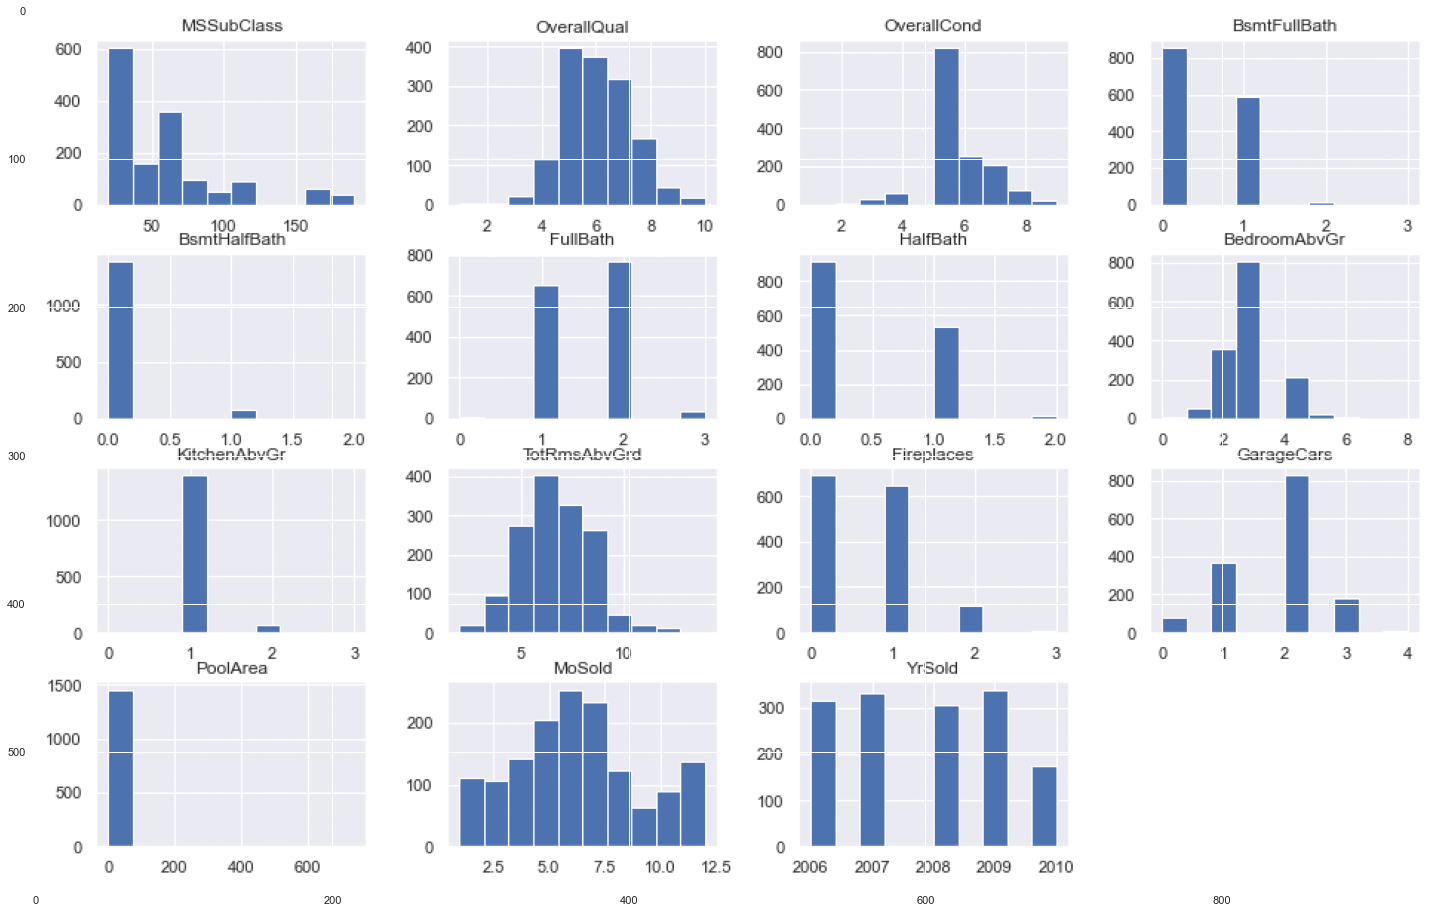

In [73]:
# train[dis_cols].hist(figsize=(16,10))
# plt.show()

# for col in dis_cols:
#     train[dis_cols].plot.bar(col)
# plt.show()

image = img.imread('./img/1.png')
fig = plt.figure(frameon=False)
fig.set_size_inches(25,25)
plt.imshow(image)


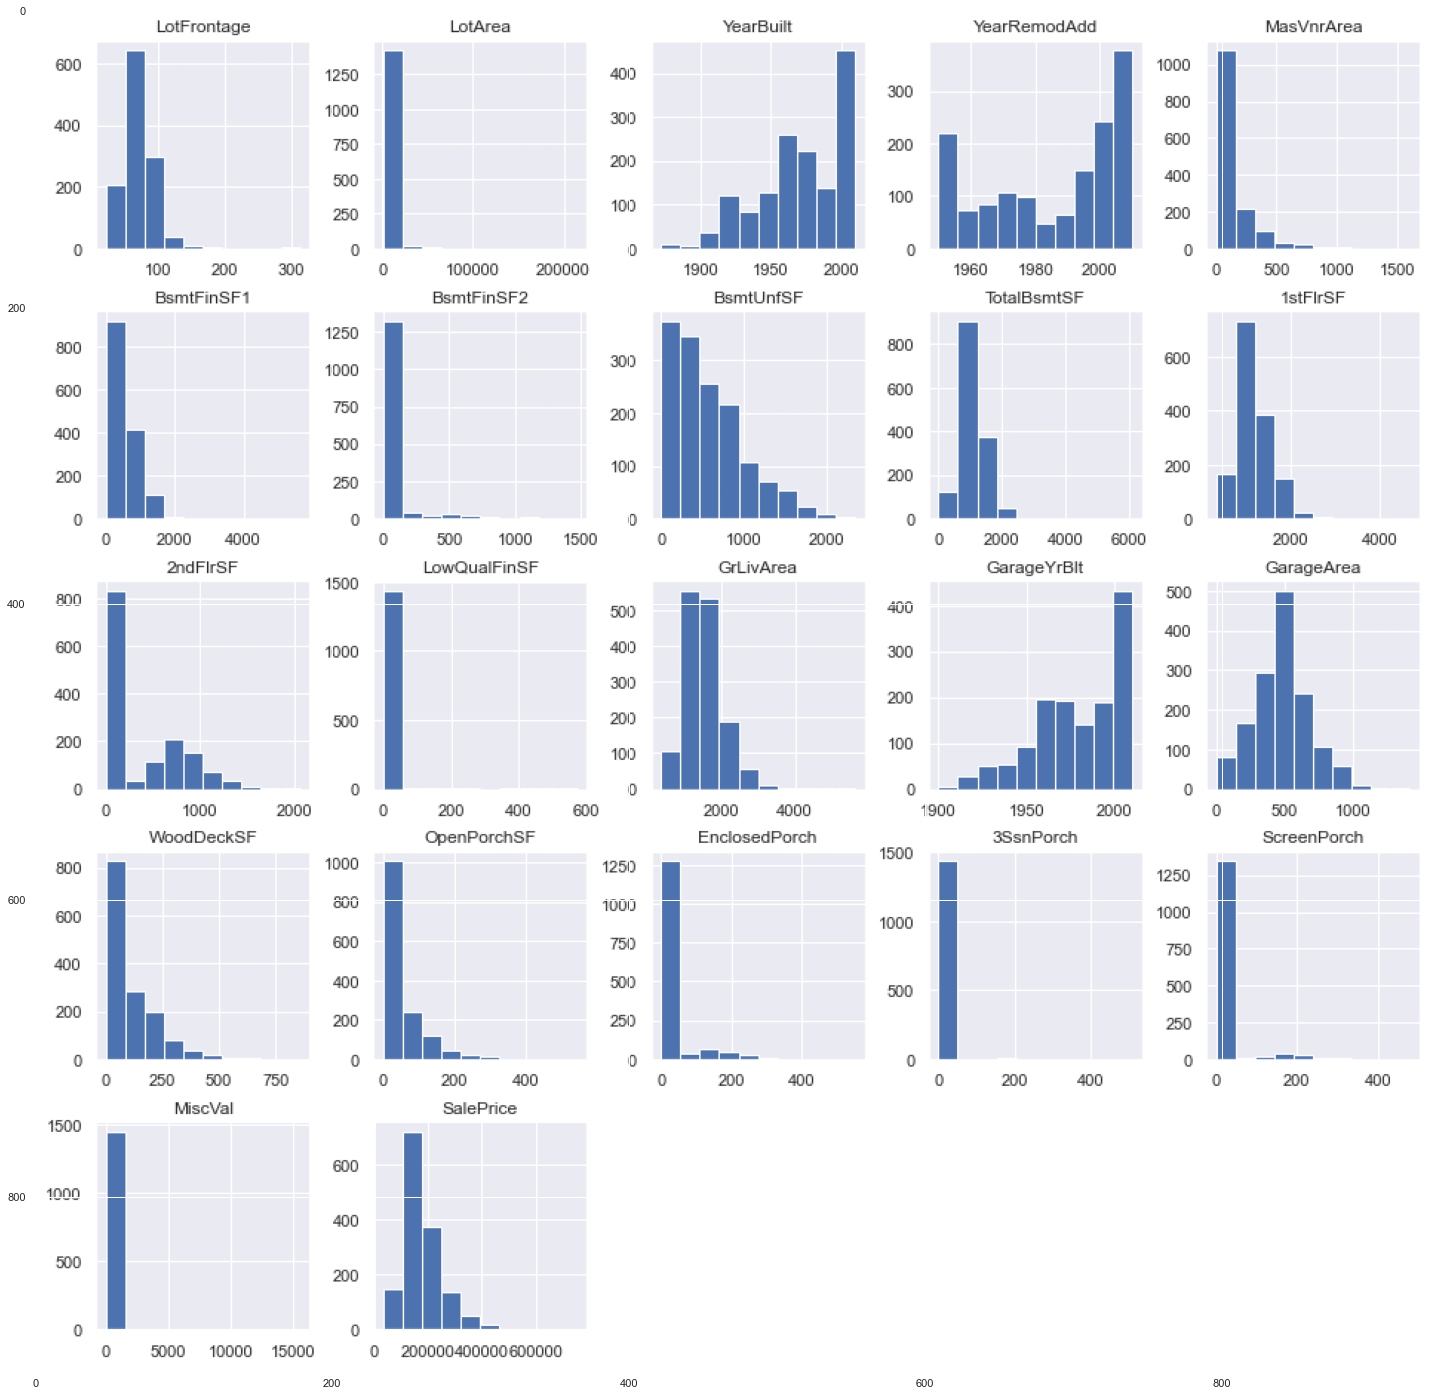

In [74]:
# train[cont_cols].hist(figsize=(16,16))
# plt.show()

image = img.imread('./img/2.png')
fig = plt.figure(frameon=False)
fig.set_size_inches(25,25)
plt.imshow(image)


### 상관분석

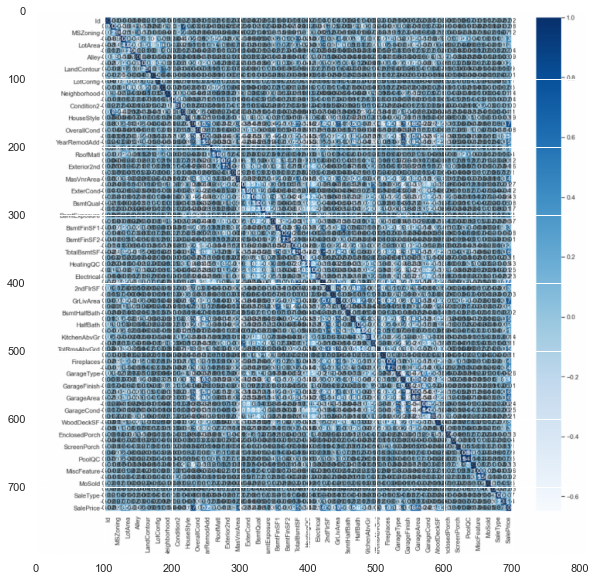

In [75]:
# fig, ax= plt.subplots(figsize=(16,16))
# sns.heatmap(train.corr(), fmt='0.2f', annot=True, cmap='Blues')
# plt.show()

image = img.imread('./img/corr.png')
fig = plt.figure(frameon=False)
fig.set_size_inches(10,10)
plt.imshow(image)

### 피쳐간 높은 상관도 top-N

In [76]:
dict_list=[]
def my_check_corr(df, cond = 0.5):
    for i, idx in enumerate(df.corr().index):
        for j, col in enumerate(df.corr().columns):
            dict = {}
            if (i<=j) & ( np.abs(df[idx].corr(df[col])) > cond) & (idx != col):
                #print(f"{idx} \t {col} \t {df[idx].corr(df[col]):.2f}")
                dict["col1"]=idx
                dict["col2"]=col
                dict["corr"]=np.round(df[idx].corr(df[col]),3)
                #dict["abs_corr"]=np.abs(np.round(df[idx].corr(df[col]),3))
                dict_list.append(dict)
my_check_corr(train) 
corr_df = pd.DataFrame(dict_list)
corr_df[['col1','col2','corr']].sort_values(by=["col1","corr"], ascending=False)

,col1,col2,corr
17,YearRemodAdd,GarageYrBlt,0.642
18,YearRemodAdd,SalePrice,0.507
16,YearRemodAdd,HeatingQC,-0.550
13,YearBuilt,GarageYrBlt,0.826
11,YearBuilt,YearRemodAdd,0.593
14,YearBuilt,GarageCars,0.538
15,YearBuilt,SalePrice,0.523
12,YearBuilt,Foundation,-0.648
26,TotalBsmtSF,1stFlrSF,0.820
27,TotalBsmtSF,SalePrice,0.614


### target에 영향을 주는 top-N

target 피쳐와 (+) 상관관계 TOP-n
 ['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd' 'GarageYrBlt' 'MasVnrArea' 'Fireplaces' 'FireplaceQu']
target 피쳐와 (-) 상관관계 TOP-n
 ['Foundation' 'HeatingQC' 'BsmtFinType1' 'ExterQual' 'GarageType']


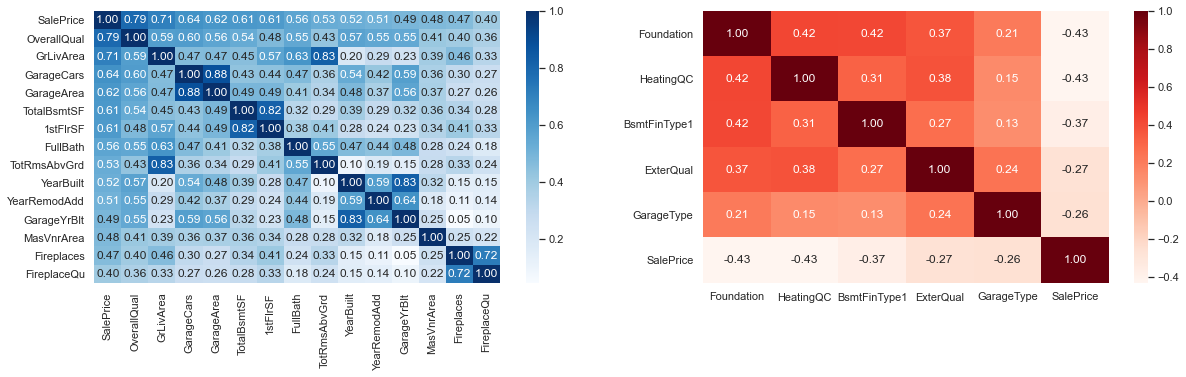

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

top_corr_large  = train.corr().nlargest(15, 'SalePrice').index
print("target 피쳐와 (+) 상관관계 TOP-n\n", top_corr_large.values)
sns.heatmap(train[top_corr_large].corr(), annot=True, cmap='Blues', fmt='0.2f' , ax=ax1)

top_corr_small = train.corr().nsmallest(5, 'SalePrice').index
print("target 피쳐와 (-) 상관관계 TOP-n\n", top_corr_small.values)
top_corr_small = np.append(top_corr_small.values, 'SalePrice')      
# print(top_corr_small)
sns.heatmap(train[top_corr_small].corr(), annot=True, cmap='Reds', fmt='0.2f' , ax=ax2)
plt.show()

* 총평 : 'OverallQual' 
* 면적관련 :'GrLivArea' 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' ,'MasVnrArea' 'BsmtFinSF1'
* 차고지관련 :'GarageCars' 'GarageArea'
* 연식 관련 : 'YearBuilt' 'YearRemodAdd' 'GarageYrBlt' 
* 기타 : 'MasVnrArea' 'Fireplaces' 'FireplaceQu

'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd' 'GarageYrBlt' 
 

#### 1) 총평 : 'OverallQual'

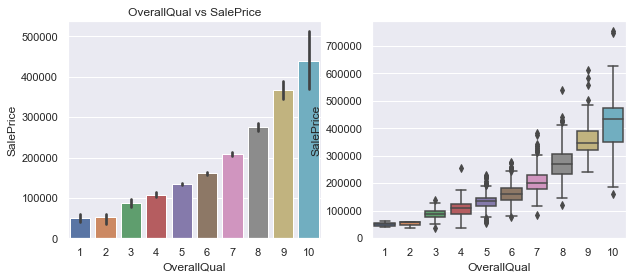

In [78]:
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.barplot('OverallQual','SalePrice',data=train,ax=ax[0])
# sns.scatterplot('OverallQual','SalePrice',data=train,ax=ax[00])
sns.boxplot('OverallQual','SalePrice',data=train,ax=ax[1])
ax[0].set_title('OverallQual vs SalePrice')
plt.show()


## 2) 다중공선 PCA
* 52	PoolArea	PoolQC	0.938	0.938  다중공선 PCA
* 47	GarageCars	GarageArea	0.882	0.882


* 회귀계수가 높은 피쳐

* 타겟과 상관도가 높은 피쳐
<pre>
'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd' 'GarageYrBlt' 'MasVnrArea' 'Fireplaces' 'FireplaceQu']

In [79]:
## 3) 

In [80]:
## 4) 

In [81]:
## 5) 

In [82]:
## 6) 

#### 데이터 분리 